## Scipy.Stats Package

### Various Random Variable Objects in `scipy.stats` package
`stats.norm()` - Normal Distribution Random Variable Object

`stats.poisson()` - Poisson Distribution Random Variable Object

`stats.uniform()` - Uniform Distribution Random Variable Object

`stats.gamma()` - Gamma Distribution Random Variable Object

`stats.expon()` - Exponential Distribution Random Variable Object

`stats.binom()` - Binomial Distribution Random Variable Objbect

`stats.f()` - F Distribution Random Variable Object

`stats.t()` - Student-t Distribution Random Variable Object

`stats.chi2()` - Chi-squared Distribution Random Variable Object

### Methods that can be applied on `scipy.stats` random variable objects
![Stats_Select_Methods_1.png](Stats_Select_Methods_1.png)
![Stats_Select_Methods_2.png](Stats_Select_Methods_2.png)

### Normal Continuous Random Varaible
- A probability distribution in which the random variable $X$ can take any value is continous random variable.
- The `norm` object of `scipy.stats` inherits a collection of generic methods from the continous random variable class.
- The `norm.cdf` function generated a continous random number.  This function takes extra arguments
    - `loc` specifies the mean
    - `scale` specifies the standard deviation

#### scipy.stats.norm.cdf function (To compute the CDF at a number of points)

In [1]:
import scipy
help(scipy.stats.norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [29]:
from scipy.stats import norm
import numpy as np
data = [1,-1.,0,1,3,4,-2,6]
datacdf = norm.cdf(data,loc=1,scale=2)
print(datacdf)
describe(datacdf)

[0.5        0.15865525 0.30853754 0.5        0.84134475 0.9331928
 0.0668072  0.99379033]


DescribeResult(nobs=8, minmax=(0.06680720126885807, 0.9937903346742238), mean=0.5377909841750264, variance=0.12534371055681193, skewness=0.04637680444481255, kurtosis=-1.4536436235184134)

#### scipy.stats.norm.ppf function (To compute the median of a distribution)
- Here ppf stands for Percent Point Function (PPF), which is inverse of the CDF.

In [3]:
from scipy.stats import norm
import numpy as np
data = [0.5,0.2,0.01,0.1,0.3]
print(norm.ppf(data))

[ 0.         -0.84162123 -2.32634787 -1.28155157 -0.52440051]


#### scipy.stats.norm.rvs (To generate a sequence of random variables)
- The function tatkes the `size` argument.

In [4]:
from scipy.stats import norm, describe
r = norm.rvs(size=15)
describe(r)

DescribeResult(nobs=15, minmax=(-1.5279170491254286, 2.469228142918331), mean=0.1668575356248767, variance=1.2041681982914385, skewness=0.48933280336696894, kurtosis=-0.44685969872061193)

### Uniform Distribution
- A uniform distribution can be generated using the `scipy.stats.unifrom` function.
- Here also, the keyword `loc` specifies the mean and `scale` specifies the standard deviation

In [5]:
from scipy.stats import uniform
import numpy as np
data = np.arange(6)
ucdfdata = uniform.cdf(data, loc=1, scale=4)
print(ucdfdata)

[0.   0.   0.25 0.5  0.75 1.  ]


### Discrete Distrbution (Binomial Distribution)
- `binom` object inherits the collection of generic methods which are avialble in `rv_discrete` class necessary to work with discrte distribtuions

In [6]:
from scipy.stats import binom
data = np.arange(6)
bincdf = binom.cdf(data,n=2,p=1)
print(bincdf)

[0. 0. 1. 1. 1. 1.]


### Descriptive Statistics
|Function|Description|
|--------|:-----------|
|`describe()`|Computes several descriptive statistics of the passed array|
|`gmean()`|Computes geometric mean along the specified axis|
|`hmean()`|Computes harmonic mean along the specified axis|
|`kurtosis()`|Computes the kurtosis (tailedness of distribtuion)|
|`mode()`|Returns the modal value|
|`skew()`|Tests the skewness of the data|
|`f_oneway()`|Performs a 1-way ANOVA|
|`iqr()`|Computes the interquartile range of the data along the|
| | specified axis|
|`zscore()`|Calculates the $z-$score of each value in the sample,|
| | relative to the sample mean and standard distribution|

In [7]:
from scipy import stats
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])
print(stats.describe(a))
print("gmean = ",stats.gmean(a))
print("hmean = ",stats.hmean(a))
print("zscore = ",stats.zscore(a))

DescribeResult(nobs=9, minmax=(1, 9), mean=5.0, variance=7.5, skewness=0.0, kurtosis=-1.2300000000000002)
gmean =  4.147166274396913
hmean =  3.181371861411138
zscore =  [-1.54919334 -1.161895   -0.77459667 -0.38729833  0.          0.38729833
  0.77459667  1.161895    1.54919334]


### Demonstration of Random Varaible Objects and PDF/PPF/CDF/PFM

In [8]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method, instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()

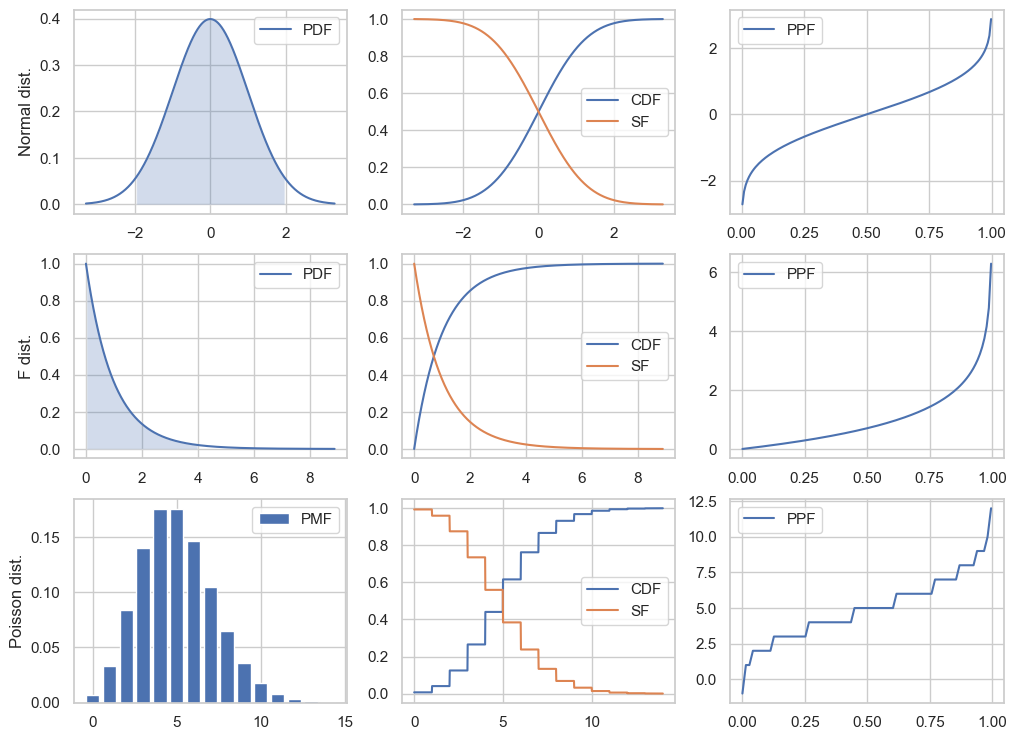

In [9]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")
plt.show()

### Plot the PDF and histogram of samples of a continuous random variable

In [10]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of 
    a continuous random variable"""

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
        
    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)
    
    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", density=True, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

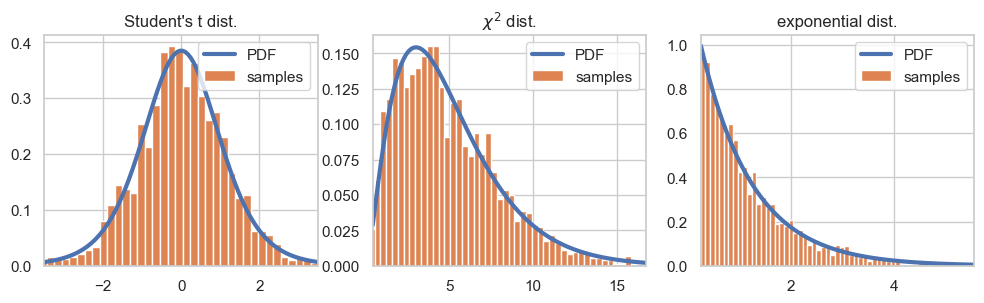

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.25)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])
plt.show()

### Fitting a random sample to known distribtuion

Consider drawing $500$ random samples from the $\chi^2$ distribution with five degrees of freedom (df$=5$) and then refitting
the random variables to the $\chi^2$ distribution using the fit method.

In [12]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
print((df, loc, scale))
Y = stats.chi2(df=df, loc=loc, scale=scale)
print((Y.mean(), Y.median(), Y.std(), Y.var()))

(4.938663772493426, 0.03452370591655797, 1.0090795677183195)
(5.018028410570349, 4.363856177209933, 3.171357051198827, 10.05750554618852)


#### Plotting the original distribution and fitted distribution

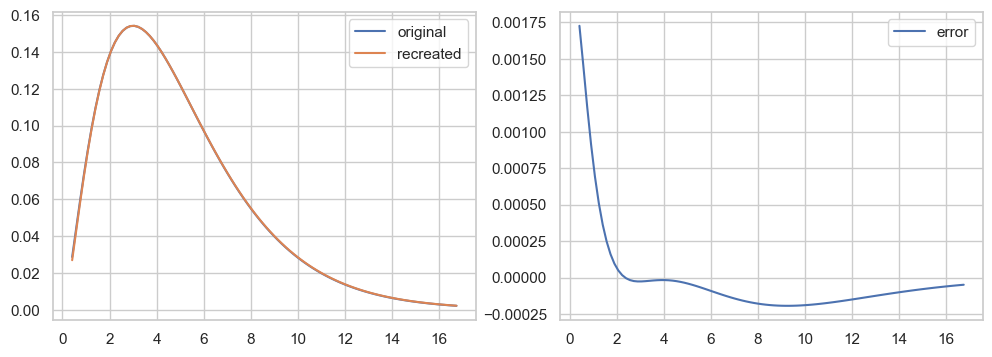

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()
plt.show()

### Hypothesis Testing using `scipy.stats` package
![Stats_HypothesisTesting.png](Stats_HypothesisTesting.png)

#### To demonstrate the hypothesis testing, let us consider **null hypothesis** that claims that a random variable $X$ has mean $\mu_0 = 1$.

At first we create a random varaible sample with $\mu_0 = 1.0$, $\mu=0.8$ and $\sigma = 0.5$.

In [14]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

#### In the next step we calculate the $z-$score

Assuming the populations standard deviation $\sigma$ is known, we can find the $z-$score by: $$z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$

In [15]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
print(z)

-4.5637786872297115


#### In the below we calculate $t-$score

Assuming the populations variance is not known, we can find the $t-$score by: $$t = \frac{\bar{x}-\mu}{\sigma_x/\sqrt{n}}$$

In [16]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
print(t)

-4.817864504246003


We now calculate the test statistics threshold of two-sided hypotheis test at the significance level of 5% (2.5% on each side)

In [17]:
# two-sided hypothesis test of significance level 5% (2.5% on each side), 
# the statistics threshold is
print(stats.norm().ppf(0.025))

-1.9599639845400545


#### Testing for accepting/resulting the null-hypothesis by $z-$test

In [18]:
print(2 * stats.norm().cdf(-abs(z))) #z-score resultant p-value

5.0241040975643355e-06


#### Testing for accepting/resulting the null-hypothesis by $t-$test

In [19]:
print(2 * stats.t(df=(n-1)).cdf(-abs(t))) #t-score resultant p-value

5.2338367197541715e-06


Both $p-$values are small and hence we reject the null hypothesis.

#### Testing the hypothesis with `stats.ttest_1samp` function and plotting the distribution with pdf

In [20]:
t, p = stats.ttest_1samp(X_samples, mu)
print((t,p))

(-0.5951667492235966, 0.5530900304924906)


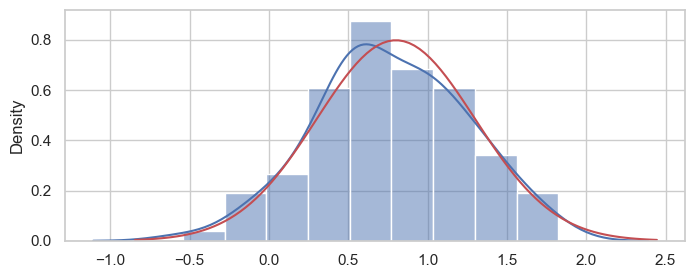

In [46]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.histplot(X_samples, ax=ax, kde=True, stat='density', kde_kws=dict(cut=3))
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x), 'r')
plt.show()

### T-test
- `stats.ttest_1samp` calculates the T-test for the mean of ONE group of scores.
- `stats.ttest_ind` calculates the T-test for the means of two independ samples of scores.

In [48]:
# Comparing mean of one sample
from scipy import stats
rvs = stats.norm.rvs(loc=5,scale = 10, size=(50,2))
print(stats.ttest_1samp(rvs,5.0))

TtestResult(statistic=array([-0.99152491,  0.69670235]), pvalue=array([0.32630056, 0.48928121]), df=array([49, 49]))


In [23]:
# Comparing means of two samples
from scipy import stats
rvs1 = stats.norm.rvs(loc=5,scale = 10, size=500)
rvs2 = stats.norm.rvs(loc=5,scale = 10, size=500)
print(stats.ttest_ind(rvs1,rvs2))

Ttest_indResult(statistic=0.03957418201393436, pvalue=0.9684405259972675)
